# Exploratory Data Analysis

POI Spending dataset is a cross-section from July 2025 filtered down to San Diego county.
Overall, we have 8537 records representing a specific business, location info, affiliated brand, business category/NAIC code, raw transaction and customer counts, as well as related cross-shopping percentages.

# Table of Contents

1. [Exploratory Data Analysis](#exploratory-data-analysis)
2. [Geographic Distribution of Businesses](#geographic-distribution-of-businesses)
   - [Business Count by City](#business-count-by-city)
   - [Business Count by Zipcode](#business-count-by-zipcode)
3. [Business Categories](#business-categories)
4. [Businesses by Total Customer](#businesses-by-total-customer)
5. [Total Spend](#total-spend)
6. [Panel Analysis](#panel-analysis)
   - [Expected vs Actual Proportions](#expected-vs-actual-proportions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Set default font sizes for all plots
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [2]:
# load the joined spend & places data for San Diego County
# selecting only columns of interest
df = pd.read_parquet('data/san-diego-county-places-spend.parquet', columns=[
        'CITY', 'LATITUDE', 'LONGITUDE', 
        'POLYGON_WKT', 'POSTAL_CODE', 'REGION', 
        'STREET_ADDRESS', 'BRANDS', 
        'LOCATION_NAME', 
        'RAW_NUM_CUSTOMERS', 'RAW_NUM_TRANSACTIONS',
        'RAW_TOTAL_SPEND',
        'RELATED_CROSS_SHOPPING_LOCAL_BRANDS_PCT',
        'RELATED_CROSS_SHOPPING_ONLINE_MERCHANTS_PCT',
        'RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT',
        'RELATED_CROSS_SHOPPING_SAME_CATEGORY_BRANDS_PCT',
        'TOP_CATEGORY'])

In [3]:
print("\nData types:")
print(df.dtypes)
print("\nMissing values by column:")
print(df.isnull().sum())


Data types:
CITY                                                object
LATITUDE                                           float64
LONGITUDE                                          float64
POLYGON_WKT                                         object
POSTAL_CODE                                        float64
REGION                                              object
STREET_ADDRESS                                      object
BRANDS                                              object
LOCATION_NAME                                       object
RAW_NUM_CUSTOMERS                                  float64
RAW_NUM_TRANSACTIONS                               float64
RAW_TOTAL_SPEND                                    float64
RELATED_CROSS_SHOPPING_LOCAL_BRANDS_PCT             object
RELATED_CROSS_SHOPPING_ONLINE_MERCHANTS_PCT         object
RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT          object
RELATED_CROSS_SHOPPING_SAME_CATEGORY_BRANDS_PCT     object
TOP_CATEGORY                               

In [4]:
df.head()

,CITY,LATITUDE,LONGITUDE,POLYGON_WKT,POSTAL_CODE,REGION,STREET_ADDRESS,BRANDS,LOCATION_NAME,RAW_NUM_CUSTOMERS,RAW_NUM_TRANSACTIONS,RAW_TOTAL_SPEND,RELATED_CROSS_SHOPPING_LOCAL_BRANDS_PCT,RELATED_CROSS_SHOPPING_ONLINE_MERCHANTS_PCT,RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT,RELATED_CROSS_SHOPPING_SAME_CATEGORY_BRANDS_PCT,TOP_CATEGORY
0,San Diego,32.755488,-117.107622,POLYGON ((-117.10754558444023 32.7555074919251...,92105.0,CA,4090 El Cajon Blvd Ste C,Pizza Hut,Pizza Hut,4.0,5.0,162.85,"{""key_value"":[{""key"":""Chevron"",""value"":25},{""k...","{""key_value"":[{""key"":""Walmart"",""value"":25},{""k...","{""key_value"":[{""key"":""Walmart"",""value"":50},{""k...","{""key_value"":[{""key"":""Church's Chicken"",""value...",Restaurants and Other Eating Places
1,San Diego,32.762727,-117.131964,POLYGON ((-117.13201920422857 32.7627738709169...,92116.0,CA,2873 Adams Ave,[],Dia Del Cafe,9.0,10.0,203.92,None,"{""key_value"":[{""key"":""Toyota"",""value"":12},{""ke...","{""key_value"":[{""key"":""Petco"",""value"":67},{""key...","{""key_value"":[{""key"":""Nékter Juice Bar"",""value...",Restaurants and Other Eating Places
2,San Diego,32.889963,-117.179930,POLYGON ((-117.18009507918524 32.8901942559195...,92121.0,CA,6364 Ferris Sq,[],Roya,12.0,12.0,397.39,None,"{""key_value"":[{""key"":""Etsy"",""value"":9},{""key"":...","{""key_value"":[{""key"":""Petco"",""value"":50},{""key...",None,"Advertising, Public Relations, and Related Ser..."
3,La Jolla,32.853546,-117.254233,POLYGON ((-117.25400457128175 32.8536535551412...,92037.0,CA,2261 Avenida de la Playa,[],Everyday California,6.0,7.0,421.40,None,"{""key_value"":[{""key"":""ADT Security Services"",""...","{""key_value"":[{""key"":""Walmart"",""value"":50},{""k...","{""key_value"":[{""key"":""Dick's Sporting Goods"",""...","Sporting Goods, Hobby, and Musical Instrument ..."
4,San Ysidro,32.545093,-117.038717,POLYGON ((-117.0387910794577 32.54518979730449...,92173.0,CA,4449 Camino de la Plz,McDonald's,McDonald's,106.0,158.0,2167.04,"{""key_value"":[{""key"":""Disney Store"",""value"":2}...","{""key_value"":[{""key"":""Walmart"",""value"":5},{""ke...","{""key_value"":[{""key"":""Walmart"",""value"":47},{""k...","{""key_value"":[{""key"":""Little Caesars"",""value"":...",Restaurants and Other Eating Places


## Geographic Distribution of Businesses

In [5]:
# summary stats
df['CITY'].value_counts().describe()

count      51.000000
mean      167.392157
std       524.427462
min         1.000000
25%         3.000000
50%        29.000000
75%       159.000000
max      3704.000000
Name: count, dtype: float64

In [6]:
# list of unique cities
df['CITY'].unique()

array(['San Diego', 'La Jolla', 'San Ysidro', 'Vista', 'Escondido',
       'Chula Vista', 'El Cajon', 'San Marcos', 'Santee', 'Fallbrook',
       'Oceanside', 'Carlsbad', 'Coronado', 'Encinitas', 'Poway',
       'National City', 'Lemon Grove', 'Valley Center', 'Pala', 'La Mesa',
       'Lakeside', 'Solana Beach', 'Imperial Beach', 'Del Mar', 'Alpine',
       'Ramona', 'Spring Valley', 'Cardiff', 'Julian', 'Pine Valley',
       'Bonita', 'Jamul', 'Boulevard', 'Camp Pendleton', 'Jacumba',
       'Bonsall', 'Santa Ysabel', 'Jacumba Hot Springs', 'Campo',
       'Pauma Valley', 'Tecate', 'Camp Pendleton South',
       'Palomar Mountain', 'Borrego Springs', 'Cardiff by the Sea',
       'Camino Real Oceanside', 'Dulzura', 'Otay Mesa', 'Diego',
       'Descanso', 'Camp Pendleton North'], dtype=object)

### Business Count by City

Observations
1. The city of San Diego is a far outlier in terms business count (3704), with Oceanside as a distant second (535)

In [7]:
df['CITY'].value_counts().head(10)

CITY
San Diego        3704
Oceanside         535
Chula Vista       521
Escondido         432
Carlsbad          429
El Cajon          378
San Marcos        243
Encinitas         235
National City     223
La Mesa           213
Name: count, dtype: int64

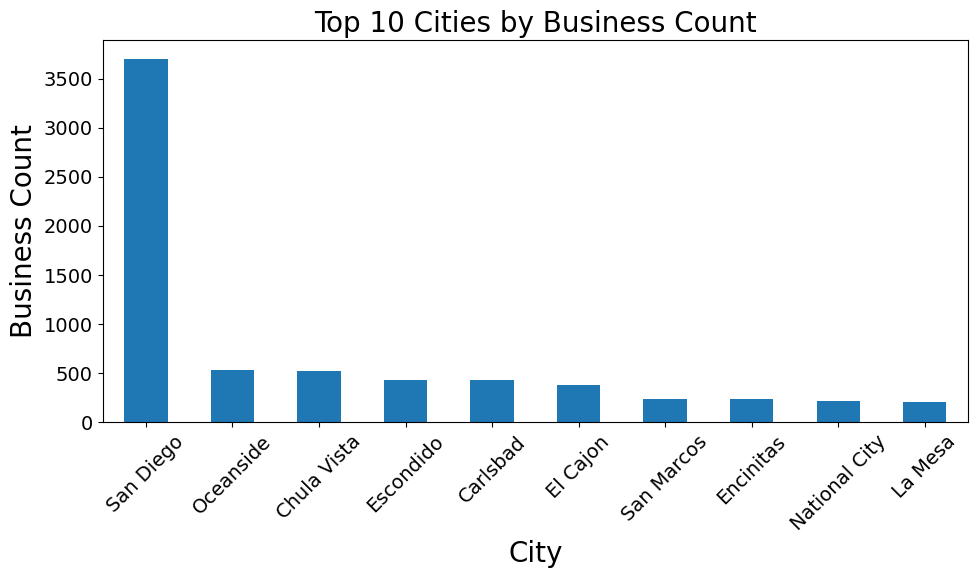

In [8]:
# top 10 cities by business count
top_10_cities = df['CITY'].value_counts().head(10)
bottom_10_cities = df['CITY'].value_counts().tail(10)

# plot the top 10 cities
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities by Business Count')
plt.xlabel('City')
plt.ylabel('Business Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


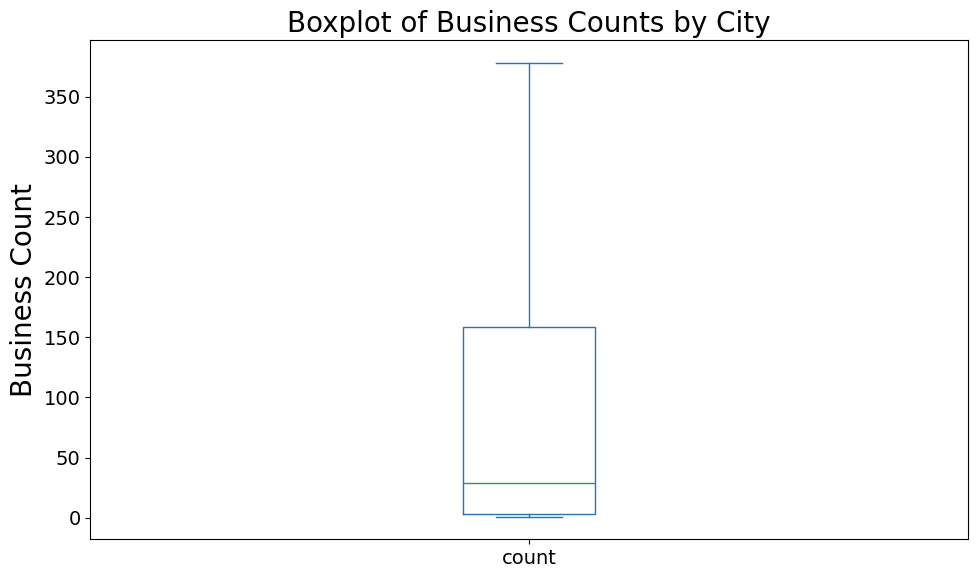

In [9]:
# plot boxplot of business counts by city exluding outliers (removes extreme cities like San Diego)
plt.figure(figsize=(10, 6))
df['CITY'].value_counts().plot(kind='box', showfliers=False)
plt.title('Boxplot of Business Counts by City')
plt.ylabel('Business Count')
plt.tight_layout()
plt.show()      

### Business Count by Zipcode

1. Dataset contains only 105 unique zipcodes despite originally filtering for 192 zipcodes during data prep
2. 92101 (Downtown San Diego), 92054 (Oceanside), 92008 (Carlsbad), 92108 (Mission Valley), 92110 (Old Towne/Point Loma) 

In [10]:
# total number of unique zipcodes
zipcodes = df['POSTAL_CODE'].unique()
print(f'Total number of unique Zipcodes: {len(zipcodes)}')

Total number of unique Zipcodes: 105


In [11]:
df['POSTAL_CODE'].value_counts()

POSTAL_CODE
92101.0    406
92054.0    286
92008.0    252
92108.0    244
92110.0    243
          ... 
92140.0      1
91943.0      1
91917.0      1
92171.0      1
92161.0      1
Name: count, Length: 105, dtype: int64

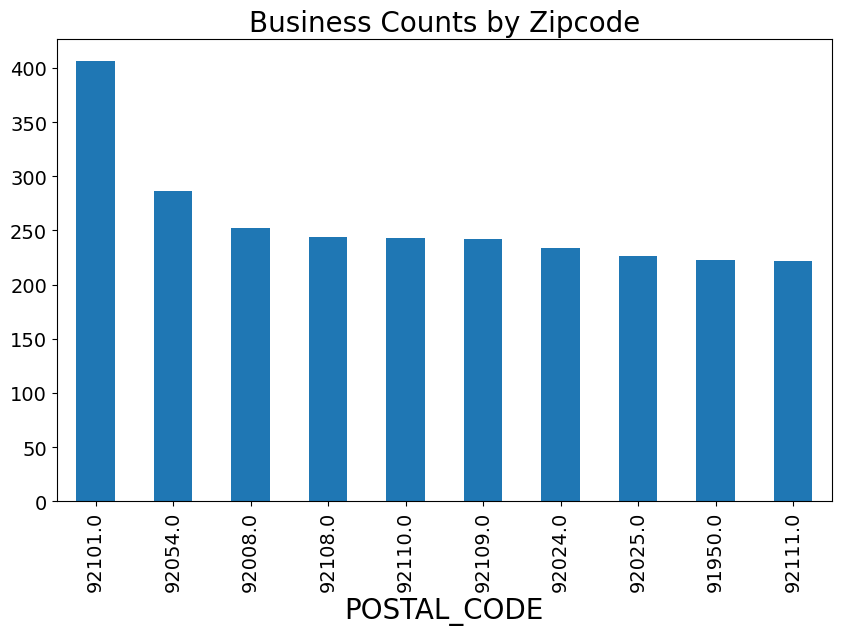

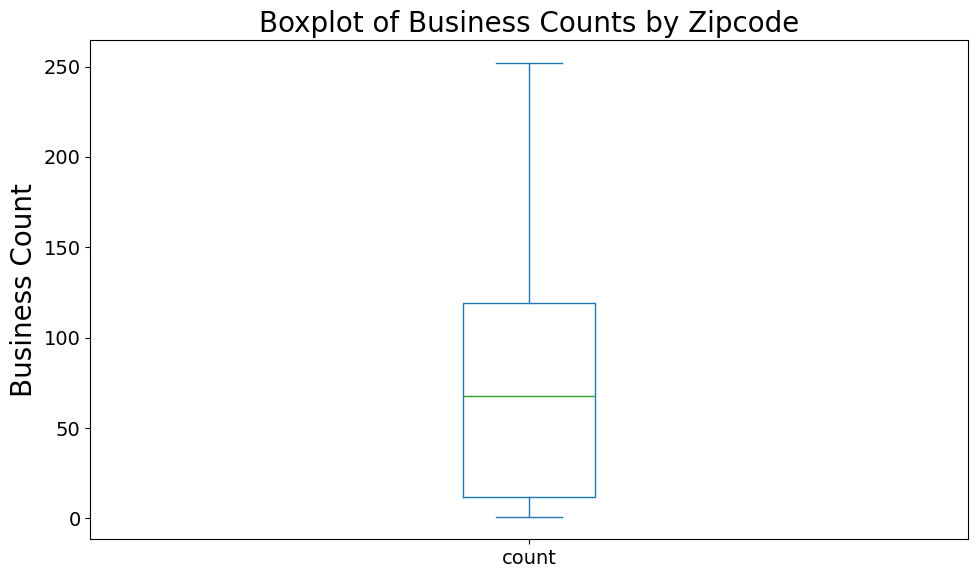

In [12]:
# top 10 zipcodes by business count
df['POSTAL_CODE'].value_counts().head(10)

# plot a barchart of the top 10 zipcodes by business count
plt.figure(figsize=(10, 6))
plt.title('Business Counts by Zipcode')
df['POSTAL_CODE'].value_counts().head(10).plot(kind='bar')

# plot boxplot of business counts by zipcode exluding outliers
plt.figure(figsize=(10, 6))
df['POSTAL_CODE'].value_counts().plot(kind='box', showfliers=False)
plt.title('Boxplot of Business Counts by Zipcode')
plt.ylabel('Business Count')
plt.tight_layout()
plt.show()

## Business Categories

In [13]:
df['TOP_CATEGORY'].value_counts()

TOP_CATEGORY
Restaurants and Other Eating Places                                       3463
Grocery Stores                                                             664
Personal Care Services                                                     342
Clothing Stores                                                            335
Gasoline Stations                                                          323
                                                                          ... 
Machine Shops; Turned Product; and Screw, Nut, and Bolt Manufacturing        1
Transit and Ground Passenger Transportation                                  1
Scenic and Sightseeing Transportation                                        1
Semiconductor and Other Electronic Component Manufacturing                   1
Religious, Grantmaking, Civic, Professional, and Similar Organizations       1
Name: count, Length: 142, dtype: int64

In [14]:
# top 5 business categories by city
df.groupby(['CITY', 'TOP_CATEGORY']).size().groupby('CITY').nlargest(5)

CITY    CITY    TOP_CATEGORY                       
Alpine  Alpine  Restaurants and Other Eating Places    17
                Clothing Stores                         6
                Beer, Wine, and Liquor Stores           2
                Grocery Stores                          2
                Health and Personal Care Stores         2
                                                       ..
Vista   Vista   Restaurants and Other Eating Places    79
                Grocery Stores                         20
                Beer, Wine, and Liquor Stores          13
                Automotive Repair and Maintenance      10
                Gasoline Stations                       8
Length: 197, dtype: int64

## Businesses by Total Customer

In [15]:
df['RAW_NUM_CUSTOMERS'].describe()

count     8537.000000
mean        38.422631
std        369.277102
min          2.000000
25%          4.000000
50%         10.000000
75%         26.000000
max      26449.000000
Name: RAW_NUM_CUSTOMERS, dtype: float64

In [16]:
# businesses by total number of customers
df.sort_values(by='RAW_NUM_CUSTOMERS', ascending=False)[['LOCATION_NAME', 'RAW_NUM_CUSTOMERS', 'RAW_NUM_TRANSACTIONS', 'RAW_TOTAL_SPEND', 'CITY', 'TOP_CATEGORY']]

,LOCATION_NAME,RAW_NUM_CUSTOMERS,RAW_NUM_TRANSACTIONS,RAW_TOTAL_SPEND,CITY,TOP_CATEGORY
7181,A,26449.0,55071.0,3514335.92,San Diego,Legal Services
3511,A,18043.0,36735.0,2156399.84,San Diego,Offices of Dentists
1486,Lively,5100.0,5405.0,212650.80,San Diego,Management of Companies and Enterprises
4175,A,5040.0,7905.0,546383.93,Chula Vista,Lessors of Real Estate
1419,Seaworld Parks And Entertainment,3803.0,9727.0,306377.54,San Diego,Amusement Parks and Arcades
...,...,...,...,...,...,...
389,Scripps La Jolla Cafet,2.0,3.0,33.27,La Jolla,Restaurants and Other Eating Places
6714,Penske Truck Rental,2.0,2.0,3642.41,Oceanside,Automotive Equipment Rental and Leasing
1281,Lakeside Car Wash,2.0,2.0,6.00,Lakeside,Automotive Repair and Maintenance
6716,Wahoo's Fish Taco,2.0,2.0,43.05,Encinitas,Restaurants and Other Eating Places


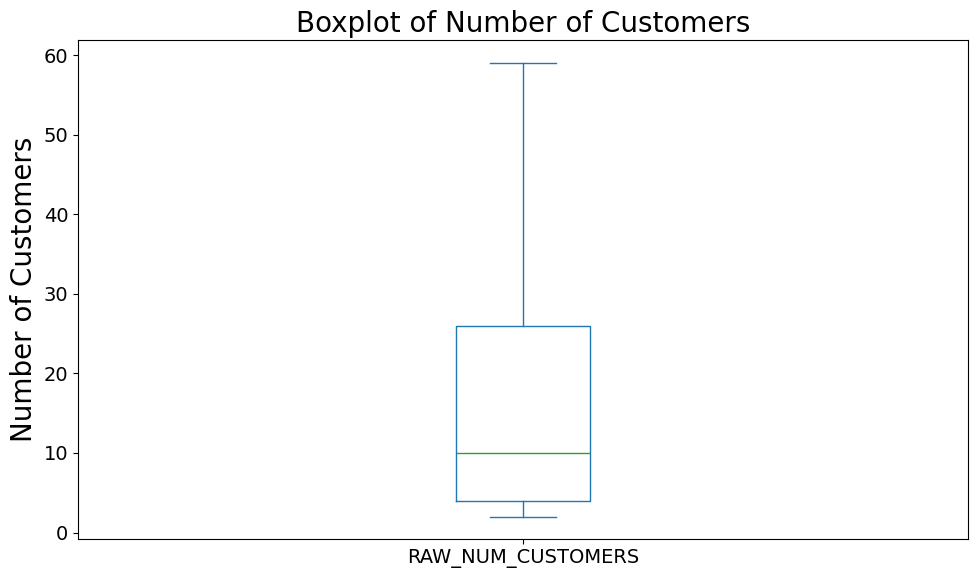

In [17]:
# plot boxplot of number of customers excluding outliers
plt.figure(figsize=(10, 6))
df['RAW_NUM_CUSTOMERS'].plot(kind='box', showfliers=False)
plt.title('Boxplot of Number of Customers')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()  

## Businesses by Total Spend

In [18]:
df['RAW_TOTAL_SPEND'].describe()

count    8.537000e+03
mean     3.112166e+03
std      4.623793e+04
min      6.000000e-01
25%      1.786100e+02
50%      4.770000e+02
75%      1.381910e+03
max      3.514336e+06
Name: RAW_TOTAL_SPEND, dtype: float64

In [19]:
# businesses by raw total spend
df.sort_values(by='RAW_TOTAL_SPEND', ascending=False)[['LOCATION_NAME', 'RAW_TOTAL_SPEND', 'RAW_NUM_CUSTOMERS', 'RAW_NUM_TRANSACTIONS', 'CITY', 'TOP_CATEGORY']]

,LOCATION_NAME,RAW_TOTAL_SPEND,RAW_NUM_CUSTOMERS,RAW_NUM_TRANSACTIONS,CITY,TOP_CATEGORY
7181,A,3514335.92,26449.0,55071.0,San Diego,Legal Services
3511,A,2156399.84,18043.0,36735.0,San Diego,Offices of Dentists
4175,A,546383.93,5040.0,7905.0,Chula Vista,Lessors of Real Estate
2079,Vuori,340287.84,1763.0,2083.0,Encinitas,Clothing Stores
1419,Seaworld Parks And Entertainment,306377.54,3803.0,9727.0,San Diego,Amusement Parks and Arcades
...,...,...,...,...,...,...
8185,California Tower,5.15,2.0,2.0,San Diego,"Museums, Historical Sites, and Similar Institu..."
7537,Planet Fitness,5.00,3.0,5.0,San Marcos,Other Amusement and Recreation Industries
2279,Apparel Printing,4.50,2.0,10.0,San Diego,"Sporting Goods, Hobby, and Musical Instrument ..."
184,ABM Parking Services,3.00,2.0,2.0,San Diego,Other Personal Services


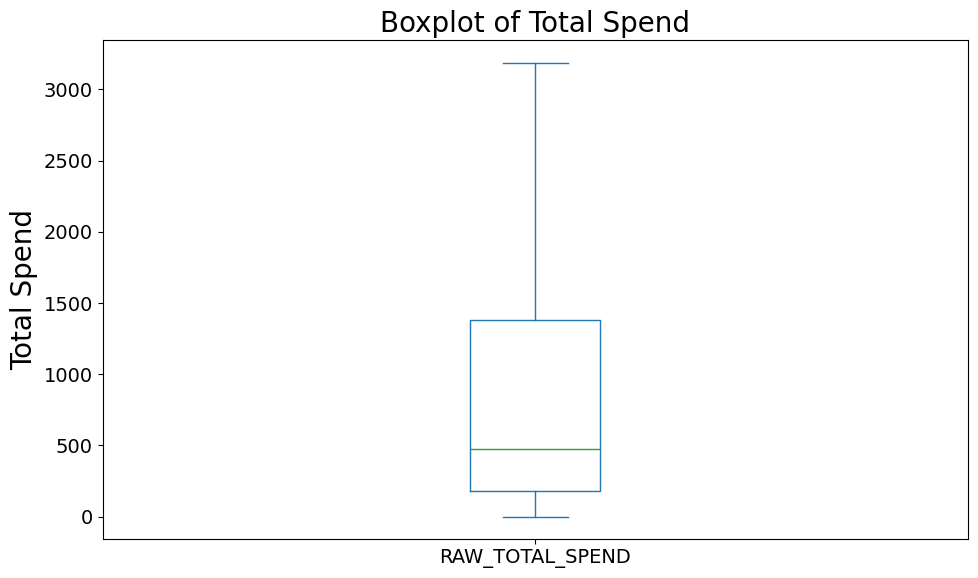

In [20]:
# plot boxplot of raw total spend excluding outliers
plt.figure(figsize=(10, 6))
df['RAW_TOTAL_SPEND'].plot(kind='box', showfliers=False)
plt.title('Boxplot of Total Spend')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()  

In [21]:
# gorcery stores by raw total spend
df[df['TOP_CATEGORY'] == 'Grocery Stores'].sort_values(by='RAW_TOTAL_SPEND', ascending=False)[['LOCATION_NAME', 'RAW_TOTAL_SPEND', 'CITY', 'TOP_CATEGORY']]

,LOCATION_NAME,RAW_TOTAL_SPEND,CITY,TOP_CATEGORY
7148,Sprouts,115152.46,San Diego,Grocery Stores
5681,Trader Joe's,112455.80,Encinitas,Grocery Stores
2668,Stater Bros. Markets,84801.40,Carlsbad,Grocery Stores
3079,Ralphs,77881.39,San Diego,Grocery Stores
2571,Trader Joe's,74828.85,Oceanside,Grocery Stores
...,...,...,...,...
7818,Sunrise Market & Liquor,19.84,Escondido,Grocery Stores
1442,Imperial Market,15.49,San Diego,Grocery Stores
6577,7-Eleven,14.91,Spring Valley,Grocery Stores
1394,Louie's Market Place,12.70,San Diego,Grocery Stores


### Panel Analysis
This section evaluates the panel of credit and debit cards utilized to construct the Spend dataset

In [22]:
df_panel = pd.read_parquet('data/panel-summary-spend-patterns_0_0_0.snappy.parquet')

FileNotFoundError: [Errno 2] No such file or directory: 'data/panel-summary-spend-patterns_0_0_0.snappy.parquet'

In [ ]:
df_panel.head()

,DATE_RANGE_END,DATE_RANGE_START,REGION,TOTAL_CUSTOMERS,TOTAL_TRANSACTIONS,TRANSACTION_TYPE
0,2019-02-01T00:00:00,2019-01-01T00:00:00,GU,2769,7960,"[{""bank"":6736,""card"":1224}]"
1,2019-02-01T00:00:00,2019-01-01T00:00:00,ALL_US,9010725,166113299,"[{""bank"":131740595,""card"":34372704}]"
2,2019-02-01T00:00:00,2019-01-01T00:00:00,AZ,256533,2989009,"[{""bank"":2269006,""card"":720003}]"
3,2019-02-01T00:00:00,2019-01-01T00:00:00,SC,276224,2920224,"[{""bank"":2377503,""card"":542721}]"
4,2019-02-01T00:00:00,2019-01-01T00:00:00,OH,618569,8204079,"[{""bank"":7439153,""card"":764926}]"


In [ ]:
df_panel[(df_panel["DATE_RANGE_START"] == '2025-07-01T00:00:00') & (df_panel["REGION"] == "ALL_US")]

,DATE_RANGE_END,DATE_RANGE_START,REGION,TOTAL_CUSTOMERS,TOTAL_TRANSACTIONS,TRANSACTION_TYPE
4291,2025-08-01T00:00:00,2025-07-01T00:00:00,ALL_US,14082390,290387413,"[{""bank"":264402179,""card"":25985234}]"


In [ ]:
df_panel[(df_panel["DATE_RANGE_START"] == '2025-07-01T00:00:00') & (df_panel["REGION"] == "CA")]

,DATE_RANGE_END,DATE_RANGE_START,REGION,TOTAL_CUSTOMERS,TOTAL_TRANSACTIONS,TRANSACTION_TYPE
4317,2025-08-01T00:00:00,2025-07-01T00:00:00,CA,2824097,12809171,"[{""bank"":11266156,""card"":1543015}]"


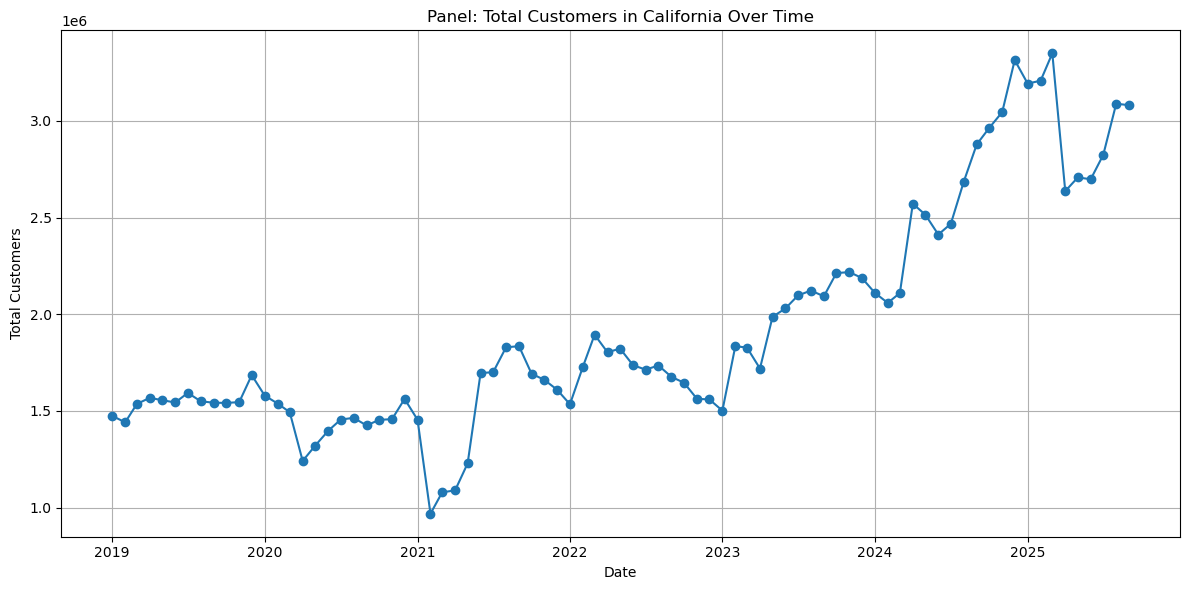

In [ ]:
df_ca = df_panel[df_panel["REGION"] == "CA"].copy()

df_ca["DATE_RANGE_START"] = pd.to_datetime(df_ca["DATE_RANGE_START"])

df_ca = df_ca.sort_values("DATE_RANGE_START")

df_ca["TOTAL_CUSTOMERS"] = pd.to_numeric(df_ca["TOTAL_CUSTOMERS"], errors="coerce")

plt.figure(figsize=(12, 6))
plt.plot(df_ca["DATE_RANGE_START"], df_ca["TOTAL_CUSTOMERS"], marker='o')
plt.title("Panel: Total Customers in California Over Time")
plt.xlabel("Date")
plt.ylabel("Total Customers")
plt.grid(True)
plt.tight_layout()
plt.show()


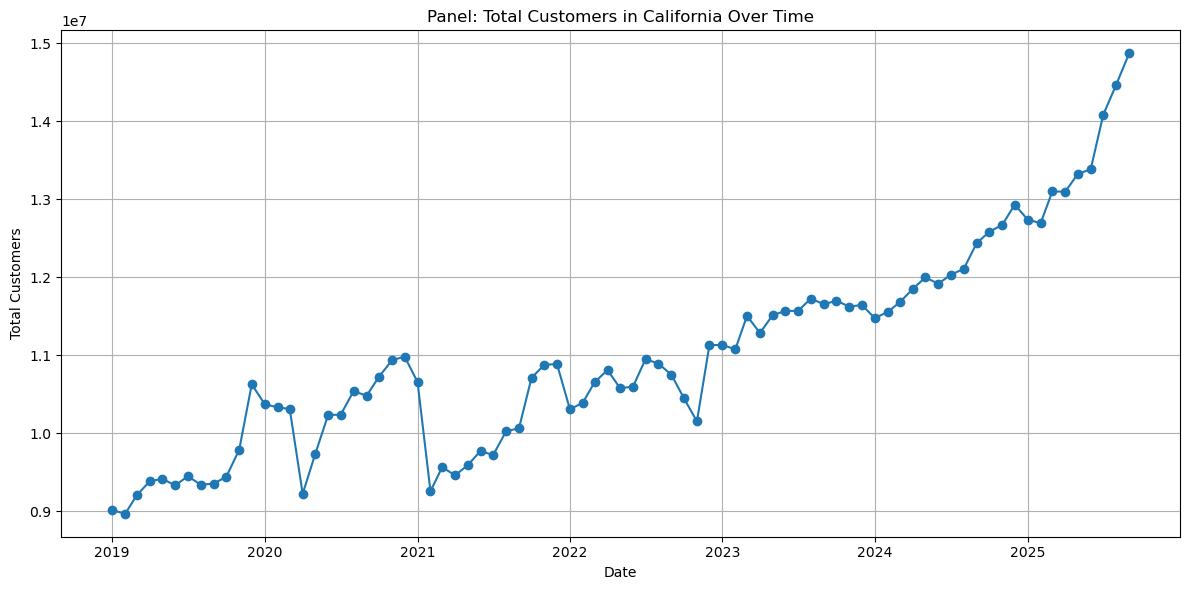

In [ ]:
df_us = df_panel[df_panel["REGION"] == "ALL_US"].copy()

df_us["DATE_RANGE_START"] = pd.to_datetime(df_us["DATE_RANGE_START"])

df_us = df_us.sort_values("DATE_RANGE_START")

df_us["TOTAL_CUSTOMERS"] = pd.to_numeric(df_us["TOTAL_CUSTOMERS"], errors="coerce")

plt.figure(figsize=(12, 6))
plt.plot(df_us["DATE_RANGE_START"], df_us["TOTAL_CUSTOMERS"], marker='o')
plt.title("Panel: Total Customers in US Over Time")
plt.xlabel("Date")
plt.ylabel("Total Customers")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Reas in Census data for bias calculations

https://data.census.gov/table/DECENNIALCD1182020.P1?q=us+population+by+state

In [ ]:
df_census = pd.read_csv('data/DECENNIALCD1182020.P1-Data.csv', skiprows=1)

In [ ]:
df_census

,Geography,Geographic Area Name,!!Total,Unnamed: 3
0,0400000US01,Alabama,5024279,NaN
1,0400000US02,Alaska,733391,NaN
2,0400000US04,Arizona,7151502,NaN
3,0400000US05,Arkansas,3011524,NaN
4,0400000US06,California,39538223,NaN
5,0400000US08,Colorado,5773714,NaN
6,0400000US09,Connecticut,3605944,NaN
7,0400000US10,Delaware,989948,NaN
8,0400000US11,District of Columbia,689545,NaN
9,0400000US12,Florida,21538187,NaN


In [ ]:
# US state abbreviation mapping dictionary
state_abbrev_map = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Puerto Rico': 'PR'
}

df_census['state_abbrev'] = df_census['Geographic Area Name'].map(state_abbrev_map)

In [ ]:
df_census.columns

Index(['Geography', 'Geographic Area Name', ' !!Total', 'Unnamed: 3',
       'state_abbrev'],
      dtype='object')

In [ ]:
df_census.rename(columns={df_census.columns[2]:"Total"}, inplace=True)


In [ ]:
all_us = df_census["Total"].astype(float).sum()

In [ ]:
# all_us_record = {
#     "Geography": "00000",
#     "Geographic Area Name": "United States",
#     "Total": all_us,
#     "Unnamed: 3": "NaN",
#     "state_abbrev": "ALL_US",
# }

# df_census = pd.concat([df_census, pd.DataFrame([all_us_record])], ignore_index=True)

In [ ]:
df_census

,Geography,Geographic Area Name,Total,Unnamed: 3,state_abbrev
0,0400000US01,Alabama,5024279,NaN,AL
1,0400000US02,Alaska,733391,NaN,AK
2,0400000US04,Arizona,7151502,NaN,AZ
3,0400000US05,Arkansas,3011524,NaN,AR
4,0400000US06,California,39538223,NaN,CA
5,0400000US08,Colorado,5773714,NaN,CO
6,0400000US09,Connecticut,3605944,NaN,CT
7,0400000US10,Delaware,989948,NaN,DE
8,0400000US11,District of Columbia,689545,NaN,DC
9,0400000US12,Florida,21538187,NaN,FL


In [ ]:
join_df.columns

Index(['Geography', 'Geographic Area Name', 'Total', 'Unnamed: 3',
       'state_abbrev', 'REGION', 'TOTAL_CUSTOMERS', 'DATE_RANGE_START'],
      dtype='object')

In [ ]:
join_df = pd.merge(df_census, df_panel[(df_panel["DATE_RANGE_START"] == '2025-07-01T00:00:00')]
[["REGION", "TOTAL_CUSTOMERS","DATE_RANGE_START"]], how = 'left', left_on = 'state_abbrev', right_on = 'REGION')
join_df["DATE_RANGE_START"] = join_df["DATE_RANGE_START"].str[:10] #just take the date string part from the "date_range_start" column

df_census_panel = join_df[["REGION", "Geographic Area Name", "TOTAL_CUSTOMERS", "Total"]]

df_census_panel

,REGION,Geographic Area Name,TOTAL_CUSTOMERS,Total
0,AL,Alabama,410764,5024279
1,AK,Alaska,32224,733391
2,AZ,Arizona,534469,7151502
3,AR,Arkansas,197132,3011524
4,CA,California,2824097,39538223
5,CO,Colorado,433312,5773714
6,CT,Connecticut,138190,3605944
7,DE,Delaware,254942,989948
8,DC,District of Columbia,142293,689545
9,FL,Florida,1561244,21538187


In [ ]:
df_census_panel.dtypes
df_census_panel["TOTAL_CUSTOMERS"] = pd.to_numeric(df_census_panel["TOTAL_CUSTOMERS"], errors="coerce")
df_census_panel["Total"] = pd.to_numeric(df_census_panel["Total"], errors="coerce")

/var/folders/4k/hqwx1ghj2nz8zjkcpbm8hj900000gn/T/ipykernel_72786/2034567649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census_panel["TOTAL_CUSTOMERS"] = pd.to_numeric(df_census_panel["TOTAL_CUSTOMERS"], errors="coerce")
/var/folders/4k/hqwx1ghj2nz8zjkcpbm8hj900000gn/T/ipykernel_72786/2034567649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census_panel["Total"] = pd.to_numeric(df_census_panel["Total"], errors="coerce")


### Expected vs Actual Proportions
If the SafeGraph transaction panel had no sampling bias, then we'd expect the proportion of customers in a given state in the panel sample to approximate the proportion of that state in the whole population.

In [ ]:
# expected proportions
df_census_panel["EXPECTED_PROPORTION"] = df_census_panel["Total"] / df_census_panel["Total"].sum()
# actual proportions
df_census_panel["ACTUAL_PROPORTION"] = df_census_panel["TOTAL_CUSTOMERS"] / df_census_panel["TOTAL_CUSTOMERS"].sum()

These proportions are pretty close, but let's define bias precisely:
- $ Bias = observed\_proportion \: - \: expected\_proportion$

In [ ]:
df_census_panel["BIAS"] = df_census_panel["ACTUAL_PROPORTION"] - df_census_panel["EXPECTED_PROPORTION"]
df_census_panel.head()

,REGION,Geographic Area Name,TOTAL_CUSTOMERS,Total,EXPECTED_PROPORTION,ACTUAL_PROPORTION,BIAS
0,AL,Alabama,410764.0,5024279,0.015010,0.015176,0.000166
1,AK,Alaska,32224.0,733391,0.002191,0.001191,-0.001000
2,AZ,Arizona,534469.0,7151502,0.021365,0.019746,-0.001619
3,AR,Arkansas,197132.0,3011524,0.008997,0.007283,-0.001714
4,CA,California,2824097.0,39538223,0.118118,0.104336,-0.013782


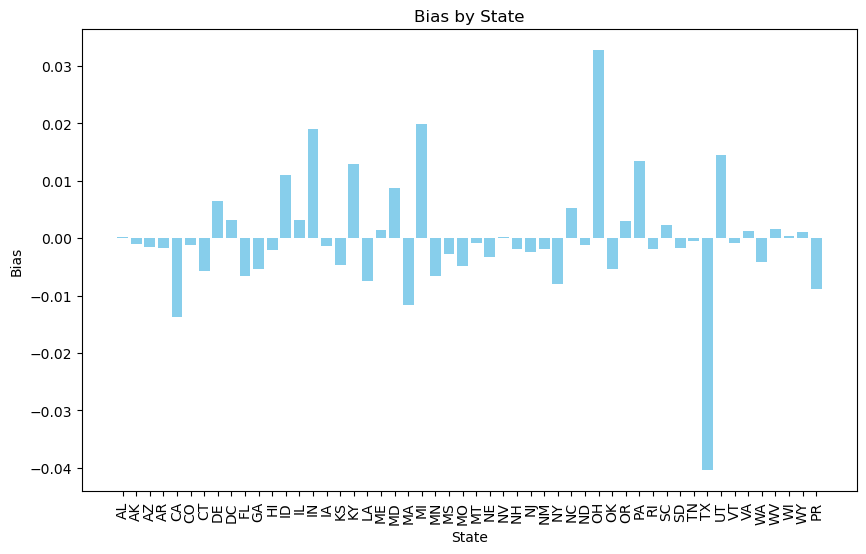

In [ ]:
# plot the bias
plt.figure(figsize=(10, 6))
plt.bar(df_census_panel['REGION'], df_census_panel['BIAS'], color='skyblue')
plt.title('Bias by State')
plt.xlabel('State')
plt.ylabel('Bias')
plt.xticks(rotation=90);

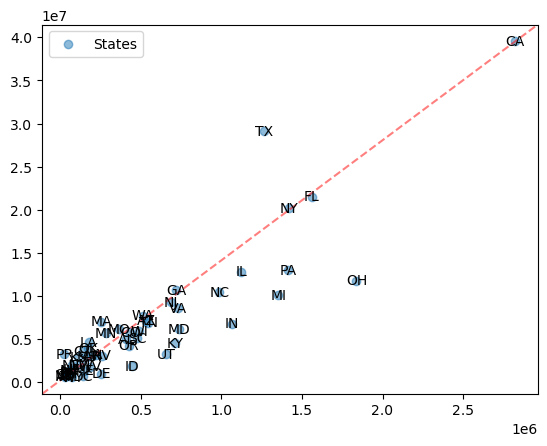

In [ ]:
fig, ax = plt.subplots()
plt.scatter(df_census_panel['TOTAL_CUSTOMERS'], df_census_panel['Total'], alpha=0.5, label='States')

ax.axline((df_census_panel['TOTAL_CUSTOMERS'].min(), df_census_panel['Total'].min()), 
(df_census_panel['TOTAL_CUSTOMERS'].max(), df_census_panel['Total'].max()), color='r', linestyle='--', alpha=0.5)

# show plot point labels
for i, row in df_census_panel.iterrows():
    ax.text(row['TOTAL_CUSTOMERS'], row['Total'], row['REGION'], ha='center', va='center', fontsize=10)

ax.legend()
plt.show()